# Lesson 3-pandas

# I. DataFrames

More detailed documentation is [here](http://pandas.pydata.org/pandas-docs/stable/indexing.html)

Now we're going to take a big leap to dataframes. dataframes are extremely useful for representing data for statistical analyses. They take dictionaries and make them much more useful. Let's look at a dictionary with our information from before

In [24]:
names=['Winston','Jess','Nick','Schmidt']
heights=[5.0,5.5,6.0,5.8]
weights=[125.0,160.0,168.0,140.0]

people={'names':names,'heights':heights,'weights':weights}
print people

{'weights': [125.0, 160.0, 168.0, 140.0], 'names': ['Winston', 'Jess', 'Nick', 'Schmidt'], 'heights': [5.0, 5.5, 6.0, 5.8]}


If we want all of Winston's data, we'd have to do this

In [25]:
print people['names'][0]
print people['heights'][0]
print people['weights'][0]

Winston
5.0
125.0


But dataframes make this easier. dataframes is part of a python package called pandas (which you already installed with jupyter). packages are repositories of python functions that you have to manually call upon using import

In [26]:
import pandas as pd # I will refer to pandas as pd for the rest of the code

# the period means that "in package pd, I want to use the function DataFrame()
people_df=pd.DataFrame(people,index=people['names'],columns=['names','heights','weights']) 
people_df

,names,heights,weights
Winston,Winston,5.0,125.0
Jess,Jess,5.5,160.0
Nick,Nick,6.0,168.0
Schmidt,Schmidt,5.8,140.0


pandas' DataFrame function automatically takes my dictionary and create this nice table. I did have to set the index argument to the people's names so I could name the rows and set the order of columns. Otherwise, I get generic number indices with columns in alphabetical order.

In [28]:
pd.DataFrame(people) 

,heights,names,weights
0,5.0,Winston,125.0
1,5.5,Jess,160.0
2,6.0,Nick,168.0
3,5.8,Schmidt,140.0


To give y'all an idea of why this is immediately useful, let's look at some of the functions we get for free with DataFrame

In [32]:
%matplotlib inline
# You need the above line in all of your scripts to make sure jupyter makes plots in the browser

print people_df['heights'].mean()
print people_df['heights'].std()
print '\n'
print people_df['heights'].describe()

5.575
0.434932945023


count    4.000000
mean     5.575000
std      0.434933
min      5.000000
25%      5.375000
50%      5.650000
75%      5.850000
max      6.000000
Name: heights, dtype: float64


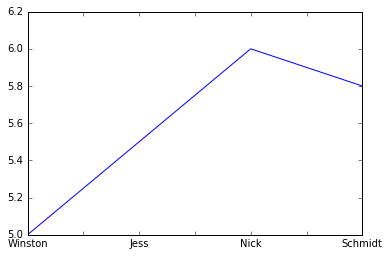

In [30]:
people_df['heights'].plot()

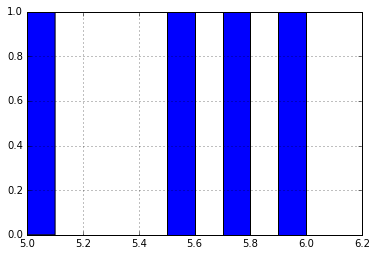

In [48]:
people_df['heights'].hist()

# II. Selecting rows and columns

We've already learned how to select columns using brackets (this is called slicing)

In [34]:
print people_df['heights']
people_df[['heights','weights']]

Winston    5.0
Jess       5.5
Nick       6.0
Schmidt    5.8
Name: heights, dtype: float64


,heights,weights
Winston,5.0,125.0
Jess,5.5,160.0
Nick,6.0,168.0
Schmidt,5.8,140.0


We can also refer to columns like this

In [33]:
people_df.heights

Winston    5.0
Jess       5.5
Nick       6.0
Schmidt    5.8
Name: heights, dtype: float64

And we can also use slicing to get out rows

In [35]:
people_df[0:2]

,names,heights,weights
Winston,Winston,5.0,125.0
Jess,Jess,5.5,160.0


In [37]:
people_df['Winston':'Jess']

,names,heights,weights
Winston,Winston,5.0,125.0
Jess,Jess,5.5,160.0


But this way of getting out rows and columns isn't the best. For example, if a row and column have the same label, like a column is called "Winston" then it's pandas doesn't know if we want the row Winston or the column Winston.

**loc** is one way to more clearly reference DataFrame sections

In [45]:
people_df.loc[['Winston','Jess'],['heights','weights']]

,heights,weights
Winston,5.0,125.0
Jess,5.5,160.0


Note, loc isn't a function--it's followed by brackets. It's an attribute/propert of the dataframe that we can index. The first field (['Winston','Jess']) are the rows we want and the second field (['heights','weights']) are the columns we want

You can also index by Booleans if you'd like, where True are the rows/columns you want

In [48]:
# Indexing by Booleans
just_jess=[False,True,False,False]
just_heights=[False,True,False]
people_df.loc[just_jess,just_heights]

,heights
Jess,5.5


**iloc** is just like loc but it takes number indices instead

In [55]:
jess_and_nick=range(1,3)
just_heights=1
people_df.iloc[jess_and_nick,just_heights] # equivalent to people_df.iloc[1:3,just_heights]

Jess    5.5
Nick    6.0
Name: heights, dtype: float64

If we want some more sophisticated selections, we can use the query function. Query is kinda weird--it takes in a string that if executed would be Python code, but with the column names.

So this example gives me everyone who is either at least 5.5 ft tall or weighs more than 150 lbs.

In [60]:
people_df.query('heights>=5.5 or weights>150')

,names,heights,weights
Jess,Jess,5.5,160.0
Nick,Nick,6.0,168.0
Schmidt,Schmidt,5.8,140.0


# groupby

We often have data that we want to group together. Maybe we want to group all trials from the same subject. Maybe we want to group all the subjects from the same condition.

In [81]:
all_subj={'subject':['C01TL','C01TL','C01TL','C01TL','D02DW','D02DW','D02DW','D02DW','E03KD','E03KD','E03KD','E03KD'],\
          'condition':[0,1,0,1,0,1,0,1,0,1,0,1],\
         'error':[23.,21.,25.,24.,13.,14.,15.,12.,10.,9.,8.,6.]}
exp_df=pd.DataFrame(all_subj,columns=['subject','condition','error'])
exp_df

,subject,condition,error
0,C01TL,0,23.0
1,C01TL,1,21.0
2,C01TL,0,25.0
3,C01TL,1,24.0
4,D02DW,0,13.0
5,D02DW,1,14.0
6,D02DW,0,15.0
7,D02DW,1,12.0
8,E03KD,0,10.0
9,E03KD,1,9.0


I can then use groupby to organize my data into groups by subjects

In [82]:
subj_groups=exp_df.groupby('subject')
subj_groups.groups # subj_groups records the indices of the different groups

{'C01TL': [0, 1, 2, 3], 'D02DW': [4, 5, 6, 7], 'E03KD': [8, 9, 10, 11]}

But MUCH more importantly, I can now get statistics on these separate groups

In [83]:
subj_groups['error'].mean()

subject
C01TL    23.25
D02DW    13.50
E03KD     8.25
Name: error, dtype: float64

I could even get statistics for each subject in each condition

In [118]:
subj_cond_groups=exp_df.groupby(['subject','condition'])
subj_cond_groups.mean()

error
subject condition       
C01TL   0           24.0
        1           22.5
D02DW   0           14.0
        1           13.0
E03KD   0            9.0
        1            7.5

This could be useful for asking questions like, "Do individual subjects do better in condition 1?"

In [147]:
group_means=subj_cond_groups.mean()

# reset index makes sure the indices start from 0 in our new data frame
cond_0=group_means.query('condition==0').reset_index()
print 'Condition 0'
print cond_0

print '\n'

cond_1=group_means.query('condition==1').reset_index() 
print 'Condition 1'
print cond_1

Condition 0
  subject  condition  error
0   C01TL          0   24.0
1   D02DW          0   14.0
2   E03KD          0    9.0


Condition 1
  subject  condition  error
0   C01TL          1   22.5
1   D02DW          1   13.0
2   E03KD          1    7.5


So if we wanted to find the difference between the conditions, within subject, we could now just subtract our columns and add the difference

In [148]:
print sum(cond_0['error']-cond_1['error'])

4.0
